# Урок 4. Сверточные нейронные сети
## Вариант 1. (простой)

## (опциционально)сравнить с точностью полносвязной сети для этой выборки

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model

from keras import models as m

import os

import matplotlib.pyplot as plt

import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

170508288/170498071 [==============================] - 3s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [3]:
labels = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
          5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [4]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

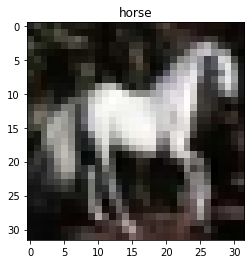

In [6]:
N = 13

plt.imshow(X_test[N])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

In [7]:
# конфигурирование слоев нейросети
model = Sequential()

# полносвязные слои нейронной сети
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(Flatten(input_shape=X_train.shape[1:]))
# полносвязный слой
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
# выходной слой с функцией активации softmax
model.add(Activation('softmax'))

model.summary()

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-

In [8]:
# Обучаем модель
hist = model.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=128, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
391/391 [==============================] - 4s 4ms/step - loss: 10609.2002 - accuracy: 0.0984 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 2/25
391/391 [==============================] - 1s 4ms/step - loss: 2.3039 - accuracy: 0.0978 - val_loss: 2.3030 - val_accuracy: 0.0999
Epoch 3/25
391/391 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3034 - val_accuracy: 0.0998
Epoch 4/25
391/391 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.0976 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 5/25
391/391 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0960 - val_loss: 2.3025 - val_accuracy: 0.0999
Epoch 6/25
391/391 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.0978 - val_loss: 2.3025 - val_accuracy: 0.0999
Epoch 7/25
391/391 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.0978 - val_loss: 2.3025 - val_accuracy: 0.0999
Ep

In [9]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 2ms/step - loss: 2.3025 - accuracy: 0.1001
Test loss 2.3025, accuracy 10.01%


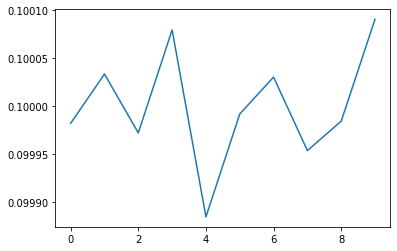

[0.09998178 0.10003334 0.09997178 0.10007945 0.09988397 0.0999916
 0.10003012 0.0999533  0.09998408 0.10009059]


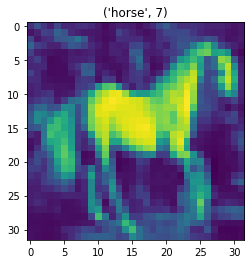

In [11]:
y_pred = model.predict(X_test)
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title((labels[np.argmax(y_test[N,:])], np.argmax(y_test[N,:])))
plt.show()

In [12]:
tf.keras.backend.clear_session()
# конфигурирование слоев нейросети
model = Sequential()

# полносвязные слои нейронной сети
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(Flatten(input_shape=X_train.shape[1:]))
# полносвязный слой
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
# выходной слой с функцией активации softmax
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [13]:
# Обучаем модель
hist = model.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=16, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
3125/3125 [==============================] - 9s 3ms/step - loss: 119455.4062 - accuracy: 0.0975 - val_loss: 2.9216 - val_accuracy: 0.1000
Epoch 2/25
3125/3125 [==============================] - 9s 3ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.9215 - val_accuracy: 0.0999
Epoch 3/25
3125/3125 [==============================] - 8s 3ms/step - loss: 2.4372 - accuracy: 0.0982 - val_loss: 2.9215 - val_accuracy: 0.0999
Epoch 4/25
3125/3125 [==============================] - 9s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.9215 - val_accuracy: 0.1000
Epoch 5/25
3125/3125 [==============================] - 9s 3ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.9216 - val_accuracy: 0.1000
Epoch 6/25
3125/3125 [==============================] - 8s 3ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.9216 - val_accuracy: 0.1000
Epoch 7/25
3125/3125 [==============================] - 8s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.9216 - val_accu

In [14]:
tf.keras.backend.clear_session()
# конфигурирование слоев нейросети
model = Sequential()

# полносвязные слои нейронной сети
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(Flatten(input_shape=X_train.shape[1:]))
# полносвязный слой
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
# выходной слой с функцией активации softmax
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [15]:
# Обучаем модель
hist = model.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=512, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
98/98 [==============================] - 1s 7ms/step - loss: 8835.4004 - accuracy: 0.1002 - val_loss: 2.3099 - val_accuracy: 0.0998
Epoch 2/25
98/98 [==============================] - 0s 5ms/step - loss: 2.3047 - accuracy: 0.1000 - val_loss: 2.3074 - val_accuracy: 0.1001
Epoch 3/25
98/98 [==============================] - 1s 5ms/step - loss: 2.3029 - accuracy: 0.1001 - val_loss: 2.3074 - val_accuracy: 0.1001
Epoch 4/25
98/98 [==============================] - 0s 5ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3073 - val_accuracy: 0.1002
Epoch 5/25
98/98 [==============================] - 0s 5ms/step - loss: 2.3022 - accuracy: 0.1002 - val_loss: 2.3069 - val_accuracy: 0.1002
Epoch 6/25
98/98 [==============================] - 0s 5ms/step - loss: 2.3025 - accuracy: 0.1002 - val_loss: 2.3071 - val_accuracy: 0.1002
Epoch 7/25
98/98 [==============================] - 0s 5ms/step - loss: 2.3019 - accuracy: 0.0998 - val_loss: 2.3072 - val_accuracy: 0.1002
Epoch 8/25
98/98 

In [16]:
tf.keras.backend.clear_session()
# конфигурирование слоев нейросети
model = Sequential()

# полносвязные слои нейронной сети
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(Flatten(input_shape=X_train.shape[1:]))
# полносвязный слой
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
# выходной слой с функцией активации softmax
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [17]:
# Обучаем модель
hist = model.fit(x=X_train,y=y_train, epochs=10,
                 batch_size=32, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8311.8643 - accuracy: 0.0966 - val_loss: 2.3074 - val_accuracy: 0.0999
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0970 - val_loss: 2.3028 - val_accuracy: 0.0999
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0961 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3036 - accuracy: 0.0965 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3028 - val_accura

In [18]:
tf.keras.backend.clear_session()
# конфигурирование слоев нейросети
model = Sequential()

# полносвязные слои нейронной сети
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(Flatten(input_shape=X_train.shape[1:]))
# полносвязный слой
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
# выходной слой с функцией активации softmax
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [19]:
# Обучаем модель
hist = model.fit(x=X_train,y=y_train, epochs=10,
                 batch_size=1024, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/10
49/49 [==============================] - 1s 12ms/step - loss: 62540.4258 - accuracy: 0.1016 - val_loss: 2.3080 - val_accuracy: 0.0999
Epoch 2/10
49/49 [==============================] - 0s 7ms/step - loss: 2.3101 - accuracy: 0.1001 - val_loss: 2.3056 - val_accuracy: 0.0999
Epoch 3/10
49/49 [==============================] - 0s 7ms/step - loss: 2.3070 - accuracy: 0.1002 - val_loss: 2.3057 - val_accuracy: 0.1000
Epoch 4/10
49/49 [==============================] - 0s 6ms/step - loss: 2.3041 - accuracy: 0.1003 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 5/10
49/49 [==============================] - 0s 7ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3062 - val_accuracy: 0.1001
Epoch 6/10
49/49 [==============================] - 0s 7ms/step - loss: 2.3023 - accuracy: 0.1003 - val_loss: 2.3064 - val_accuracy: 0.1001
Epoch 7/10
49/49 [==============================] - 0s 6ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3061 - val_accuracy: 0.1001
Epoch 8/10
49/4

In [20]:
tf.keras.backend.clear_session()
# конфигурирование слоев нейросети
model = Sequential()

# полносвязные слои нейронной сети
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(Flatten(input_shape=X_train.shape[1:]))
# полносвязный слой
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
# выходной слой с функцией активации softmax
model.add(Activation('softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [21]:
# Обучаем модель
hist = model.fit(x=X_train,y=y_train, epochs=15,
                 batch_size=256, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/15
196/196 [==============================] - 1s 5ms/step - loss: 4291.6465 - accuracy: 0.0995 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 2/15
196/196 [==============================] - 1s 4ms/step - loss: 2.3033 - accuracy: 0.0979 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/15
196/196 [==============================] - 1s 4ms/step - loss: 2.3029 - accuracy: 0.0993 - val_loss: 2.3037 - val_accuracy: 0.1001
Epoch 4/15
196/196 [==============================] - 1s 4ms/step - loss: 2.3025 - accuracy: 0.0975 - val_loss: 2.3040 - val_accuracy: 0.1001
Epoch 5/15
196/196 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.0972 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 6/15
196/196 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 7/15
196/196 [==============================] - 1s 4ms/step - loss: 2.3023 - accuracy: 0.0985 - val_loss: 2.3039 - val_accuracy: 0.1000
Epo

Выводы:
- не удалось добиться приемлемых результатов для данного датасета;
- возможно неверно построил полносвязанную сеть;
- данная сеть уступает всем предыдущим тестам.